In [2]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv('scripts_graph/filename_.csv', delimiter=' ', header=None, names=header)
df.head()

NameError: name 'header' is not defined

In [27]:
q_10 = np.quantile(df.objective.values, 0.80)
print(q_10)

0.8157894736842105


In [36]:
df =pd.read_csv('scripts_graph/filename_.csv', delimiter=' ', header=None, names=header)
df.head()
real_df = df.loc[df['objective'] > q_10].drop(columns=['elapsed_sec', 'duration', 'objective', 'id'])

In [52]:
print(real_df.head())

       decay   dropout     hc        lr  n_lays  th_updates  tot_updates  \
5   0.009861  0.990935  124.0  0.000030    16.0        19.0       3375.0   
8   0.011905  0.828766   81.0  0.001505     7.0        10.0       3949.0   
20  0.000147  0.843688  125.0  0.006234    17.0         6.0       1848.0   
23  0.055289  0.571867   66.0  0.007216    15.0         5.0       2613.0   
31  0.000105  0.862011   90.0  0.003223    12.0        18.0       1972.0   

    x_updates  
5         1.0  
8        10.0  
20       17.0  
23       10.0  
31       20.0  


In [39]:
model = GaussianCopula()
model.fit(real_df)

/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: 

In [53]:
new_data = model.sample(num_rows= 100)

In [56]:
new_data.to_dict(orient='records')


[{'decay': 1.4907589241535824e-06,
  'dropout': 0.5502823551680934,
  'hc': 72.0,
  'lr': 0.006720366638706018,
  'n_lays': 19.0,
  'th_updates': 6.0,
  'tot_updates': 2504.0,
  'x_updates': 15.0},
 {'decay': 0.1517132702143603,
  'dropout': 0.13233916137787366,
  'hc': 104.0,
  'lr': 7.174672824403777e-05,
  'n_lays': 12.0,
  'th_updates': 14.0,
  'tot_updates': 1745.0,
  'x_updates': 19.0},
 {'decay': 0.0003357297484234081,
  'dropout': 0.7334617012222809,
  'hc': 77.0,
  'lr': 0.0001362680210459291,
  'n_lays': 20.0,
  'th_updates': 7.0,
  'tot_updates': 3150.0,
  'x_updates': 15.0},
 {'decay': 0.09972106790237976,
  'dropout': 0.3319272079621772,
  'hc': 73.0,
  'lr': 0.004408241313412556,
  'n_lays': 20.0,
  'th_updates': 8.0,
  'tot_updates': 2098.0,
  'x_updates': 20.0},
 {'decay': 0.003002865122303342,
  'dropout': 0.7074921317094398,
  'hc': 66.0,
  'lr': 0.0021585119532253486,
  'n_lays': 15.0,
  'th_updates': 5.0,
  'tot_updates': 2239.0,
  'x_updates': 19.0},
 {'decay': 3.5

In [59]:
def provide_hps(filename, quantoo):
    import numpy as np 
    import pandas as pd
    from sdv.tabular import GaussianCopula
    df =pd.read_csv('scripts_graph/results.csv', delimiter=',', header=None)
    header=df.values[0,:]
    df =pd.read_csv(filename, delimiter=' ', header=None, names=header)
    q_10 = np.quantile(df.objective.values, quantoo)
    real_df = df.loc[df['objective'] > q_10].drop(columns=['elapsed_sec', 'duration', 'objective', 'id'])
    model = GaussianCopula()
    model.fit(real_df)
    new_data = model.sample(num_rows= 100)
    return new_data.to_dict(orient='records')
    
    


/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: 

In [61]:
print(len(hps_dict))
hps_dict

100


[{'decay': 0.005439015435825329,
  'dropout': 0.0100346303634233,
  'hc': 75.0,
  'lr': 0.019241635836435053,
  'n_lays': 5.0,
  'th_updates': 6.0,
  'tot_updates': 2073.0,
  'x_updates': 16.0},
 {'decay': 0.070908962053297,
  'dropout': 0.0100346303634233,
  'hc': 81.0,
  'lr': 0.002837311723844206,
  'n_lays': 19.0,
  'th_updates': 10.0,
  'tot_updates': 4765.0,
  'x_updates': 16.0},
 {'decay': 0.00028867355677211163,
  'dropout': 0.6741897454488217,
  'hc': 78.0,
  'lr': 0.001660982864276741,
  'n_lays': 18.0,
  'th_updates': 9.0,
  'tot_updates': 2289.0,
  'x_updates': 8.0},
 {'decay': 0.10060645292352345,
  'dropout': 0.9909353205429642,
  'hc': 44.0,
  'lr': 0.004118996559556663,
  'n_lays': 16.0,
  'th_updates': 14.0,
  'tot_updates': 2682.0,
  'x_updates': 16.0},
 {'decay': 1.4213633204854894e-06,
  'dropout': 0.8400361582627129,
  'hc': 77.0,
  'lr': 0.02104274547574428,
  'n_lays': 9.0,
  'th_updates': 4.0,
  'tot_updates': 4768.0,
  'x_updates': 10.0},
 {'decay': 0.314682982

/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: 

Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2
MUTAG(188)


AttributeError: 'NoneType' object has no attribute 'num_classes'

Following code is what I am going to use to make plots and calculate numbers

In [16]:
import numpy as np 
import pandas as pd
from sdv.tabular import GaussianCopula
# First let us gather data

data_to_plot = pd.read_csv('scripts_graph/results_fi/acc_MUTAG_DH.csv', delimiter=',')

model = GaussianCopula()
model.fit(data_to_plot)
new_data = model.sample(num_rows= 10000)
new_data.columns=['Mutag']
print(new_data.agg(['min', 'max', 'mean', 'std']).round(decimals=6))

data_to_plot = pd.read_csv('scripts_graph/results_fi/acc_Proteins_DH.csv', delimiter=',')
print(data_to_plot.agg(['min', 'max', 'mean', 'std']).round(decimals=6))
model = GaussianCopula()
model.fit(data_to_plot)
new_data_P = model.sample(num_rows= 10000)
print(new_data_P.agg(['min', 'max', 'mean', 'std']).round(decimals=6))
new_data_P.columns=['Proteins']
df = pd.concat((new_data, new_data_P), axis =1)
print(df.head())

/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


         Mutag
min   0.684211
max   0.947368
mean  0.839539
std   0.055120
      4.708520179372197578e-01
min                   0.403587
max                   0.663677
mean                  0.568091
std                   0.071905


/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


      4.708520179372197578e-01
min                   0.403587
max                   0.663677
mean                  0.577699
std                   0.061008
      Mutag  Proteins
0  0.884313  0.663677
1  0.827216  0.663677
2  0.852392  0.663677
3  0.832586  0.585500
4  0.760258  0.528109


0.4035874439461884
0.42959641255605385
0.4556053811659193
0.48161434977578477
0.5076233183856502
0.5336322869955157
0.5596412556053811
0.5856502242152467
0.6116591928251122
0.6376681614349776


[]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Myriad Hebrew


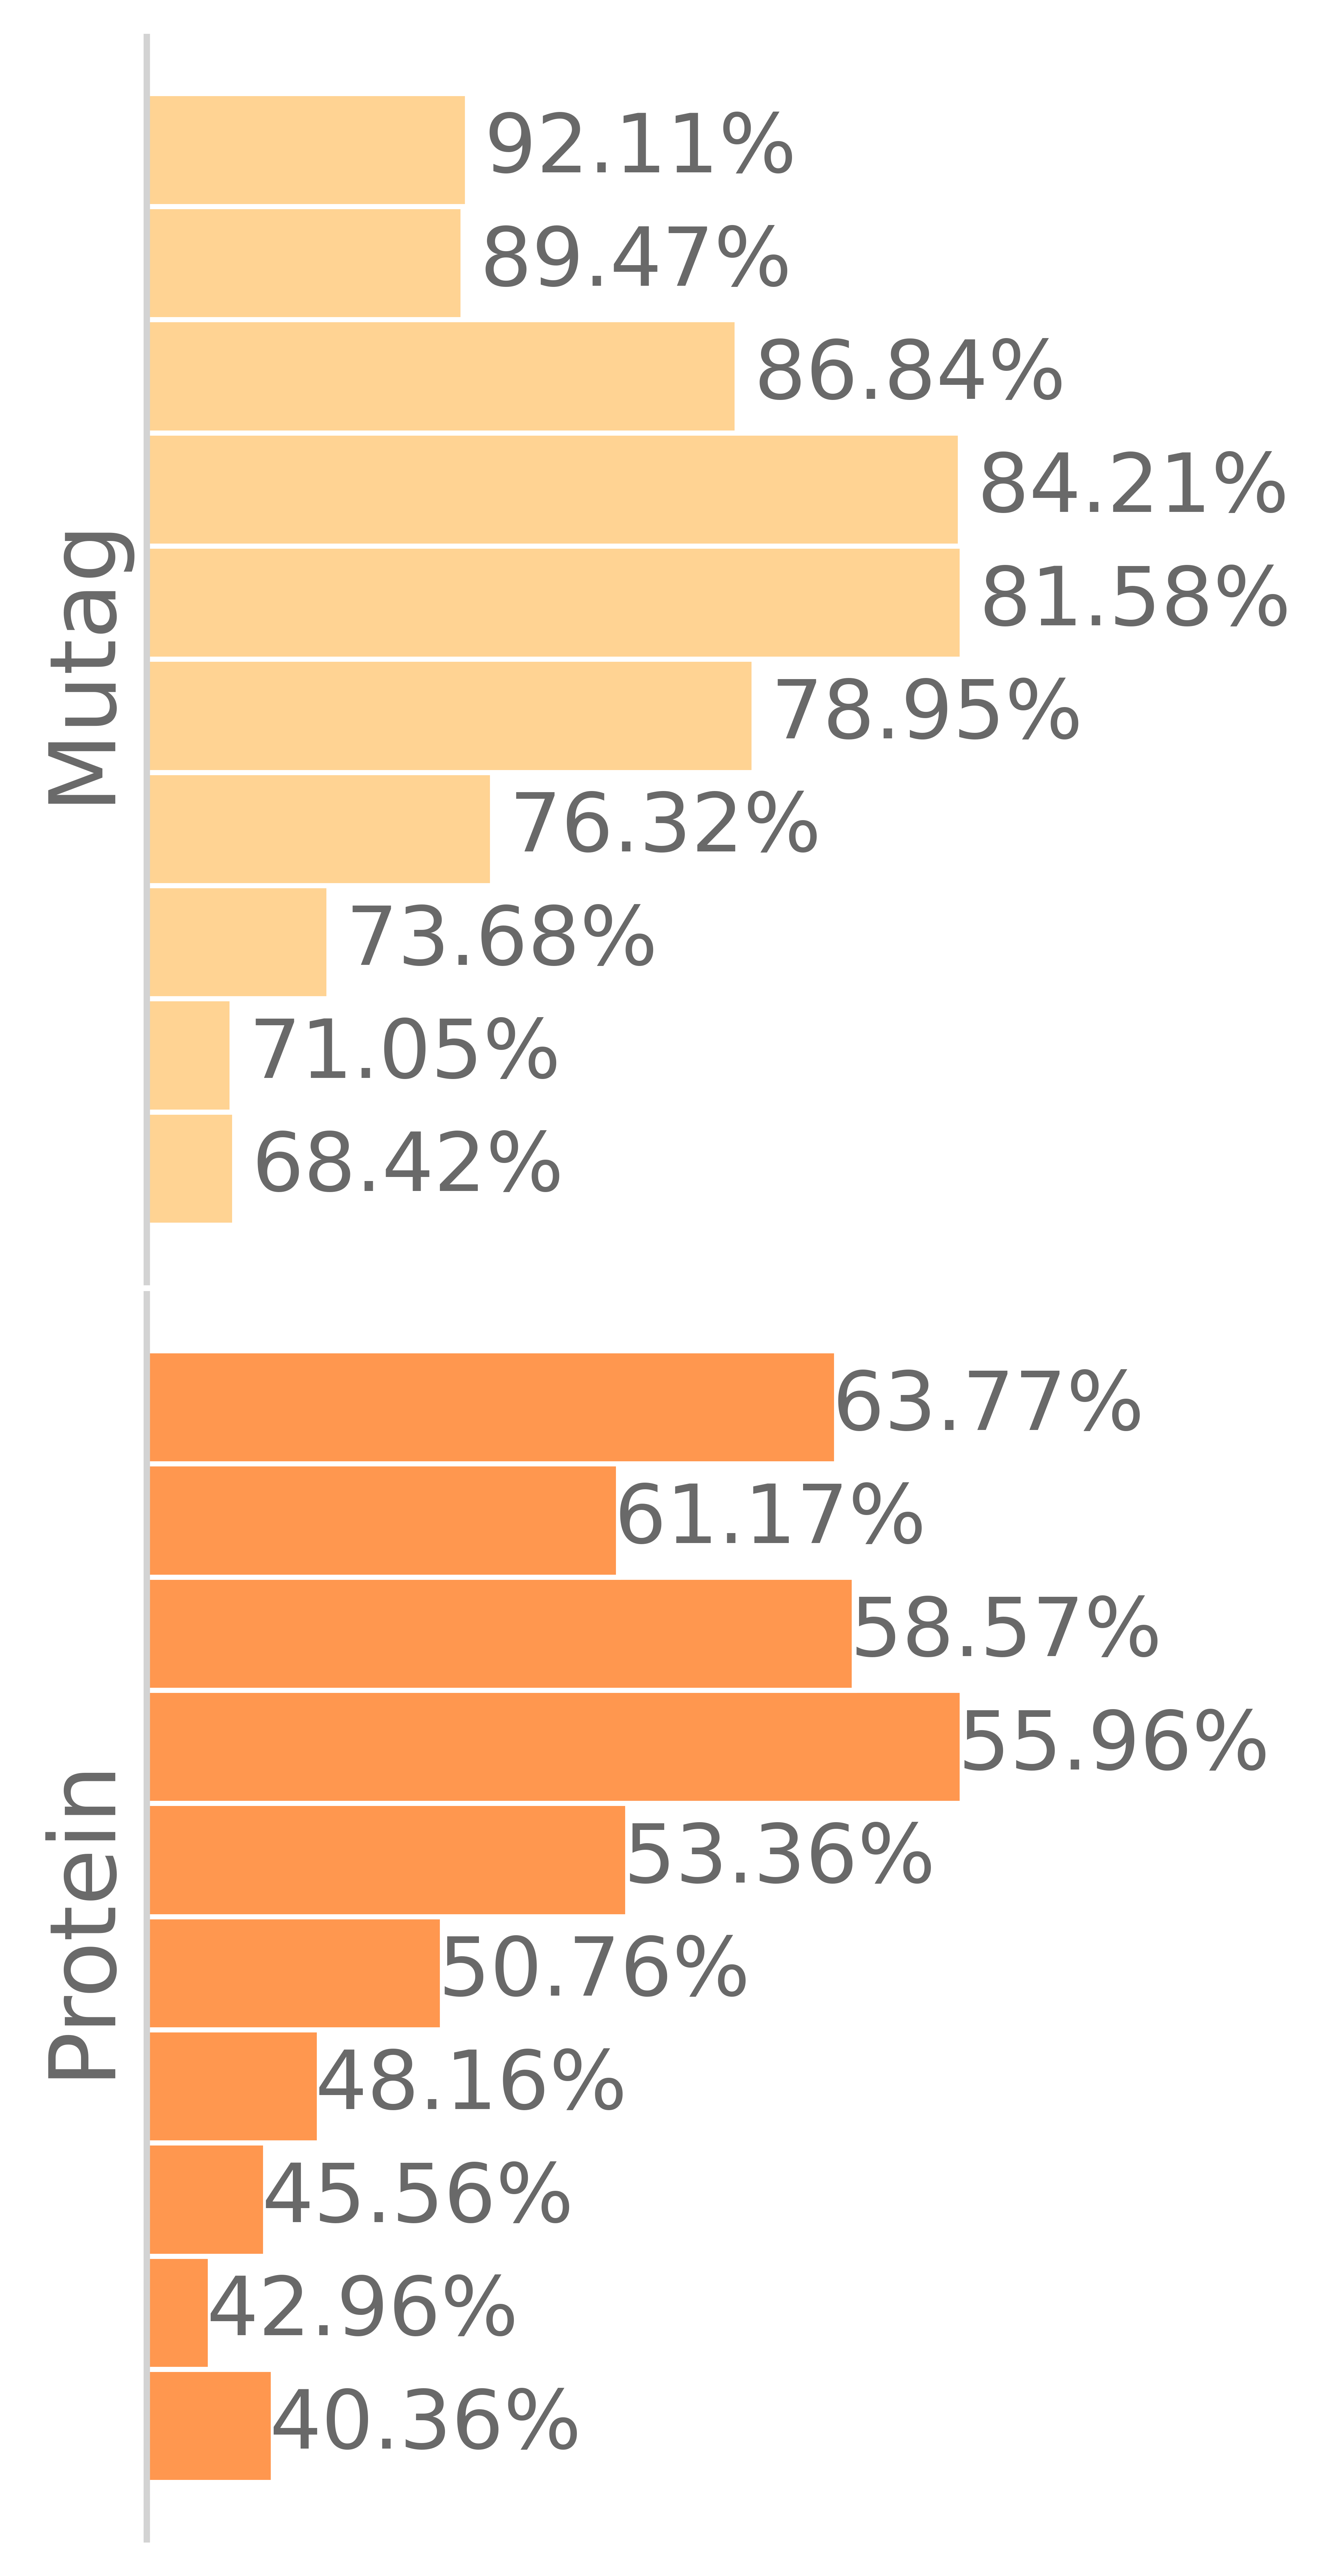

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

CB91_Blue = '#05e1e1'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = ['#405952',
'#9C9B7A',
'#FFD393',
'#FF974F',
'#F54F29',
]
CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

small = 16
med = 18
large = 20


plt.style.use('seaborn-white')
COLOR = 'dimgrey'
rc={'axes.titlesize': small,
    'legend.fontsize': small,
    'axes.labelsize': med,
    'axes.titlesize': small,
    'xtick.labelsize': small,
    'ytick.labelsize': med,
    'figure.titlesize': small, 
    'font.family': "sans-serif",
    'font.sans-serif': "Myriad Hebrew",
    'text.color' : COLOR,
    'axes.labelcolor' : COLOR,
    'axes.axisbelow': False,
    'axes.edgecolor': 'lightgrey',
    'axes.facecolor': 'None',
    'axes.grid': False,
    'axes.labelcolor': 'dimgrey',
    'axes.spines.right': False,
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'figure.facecolor': 'white',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'w',
    'patch.force_edgecolor': True,
    'text.color': 'dimgrey',
    'xtick.bottom': False,
    'xtick.color': 'dimgrey',
    'xtick.direction': 'out',
    'xtick.top': False,
    'ytick.color': 'dimgrey',
    'ytick.direction': 'out',
    'ytick.left': False,
    'ytick.right': False}
plt.rcParams.update(rc)
plt.rc('text', usetex = False)
offset=3
fig,ax =  plt.subplots(2,1, figsize=(3,9), dpi = 1000, gridspec_kw = {'wspace':0.01, 'hspace':0.01})
# Make some labels.
ax[0].hist(df['Mutag'], orientation="horizontal", color = color_list[2], density=True)
rects = ax[0].patches
labels = [i for i in rects]
for rect in rects:
    width = rect.get_width()
    _,label=rect.get_xy()
    ax[0].text(width+offset, (rect.get_y() + rect.get_height() / 2), 
            s=f'{round(label*100,2)}%', #Required label with formatting
            va='center', #Vertical alignment
            ha='right', #Horizontal alignment
            color=COLOR, #Font colour and size
            fontsize=small)


# Make some labels.
ax[1].hist(df['Proteins'], orientation="horizontal", color = color_list[3], density=True)
rects = ax[1].patches
labels = [i for i in rects]
for rect in rects:
    width = rect.get_width()
    _,label=rect.get_xy()
    print(label)
    ax[1].text((width+offset), (rect.get_y() + rect.get_height() / 2), 
            s=f'{round(label*100,2)}%', #Required label with formatting
            va='center', #Vertical alignment
            ha='right', #Horizontal alignment
            color=COLOR, #Font colour and size
            fontsize=small)

ax[0].set_ylabel('Mutag')
ax[1].set_ylabel('Protein')
# plt.legend(frameon=False)
sns.despine(left=False, bottom=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])


/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: 

['dropout', 'hc', 'n_lays', 'lr', 'tot_updates', 'x_updates']
dropout 0       0.258983
1       0.393565
2       0.386597
3       0.990935
4       0.591637
          ...   
9995    0.508172
9996    0.990935
9997    0.259315
9998    0.153362
9999    0.875644
Name: dropout, Length: 10000, dtype: float64
dropout 10000
hc 0        72.0
1        48.0
2        57.0
3        87.0
4        73.0
        ...  
9995     52.0
9996    102.0
9997     52.0
9998     30.0
9999     88.0
Name: hc, Length: 10000, dtype: float64
hc 10000
n_lays 0       10.0
1        6.0
2       14.0
3       14.0
4       14.0
        ... 
9995    11.0
9996    16.0
9997    19.0
9998    14.0
9999    13.0
Name: n_lays, Length: 10000, dtype: float64
n_lays 10000
lr 0       0.001591
1       0.000826
2       0.004771
3       0.008171
4       0.002688
          ...   
9995    0.003524
9996    0.008444
9997    0.000046
9998    0.002789
9999    0.001229
Name: lr, Length: 10000, dtype: float64
lr 10000
tot_updates 0       2751.0
1    

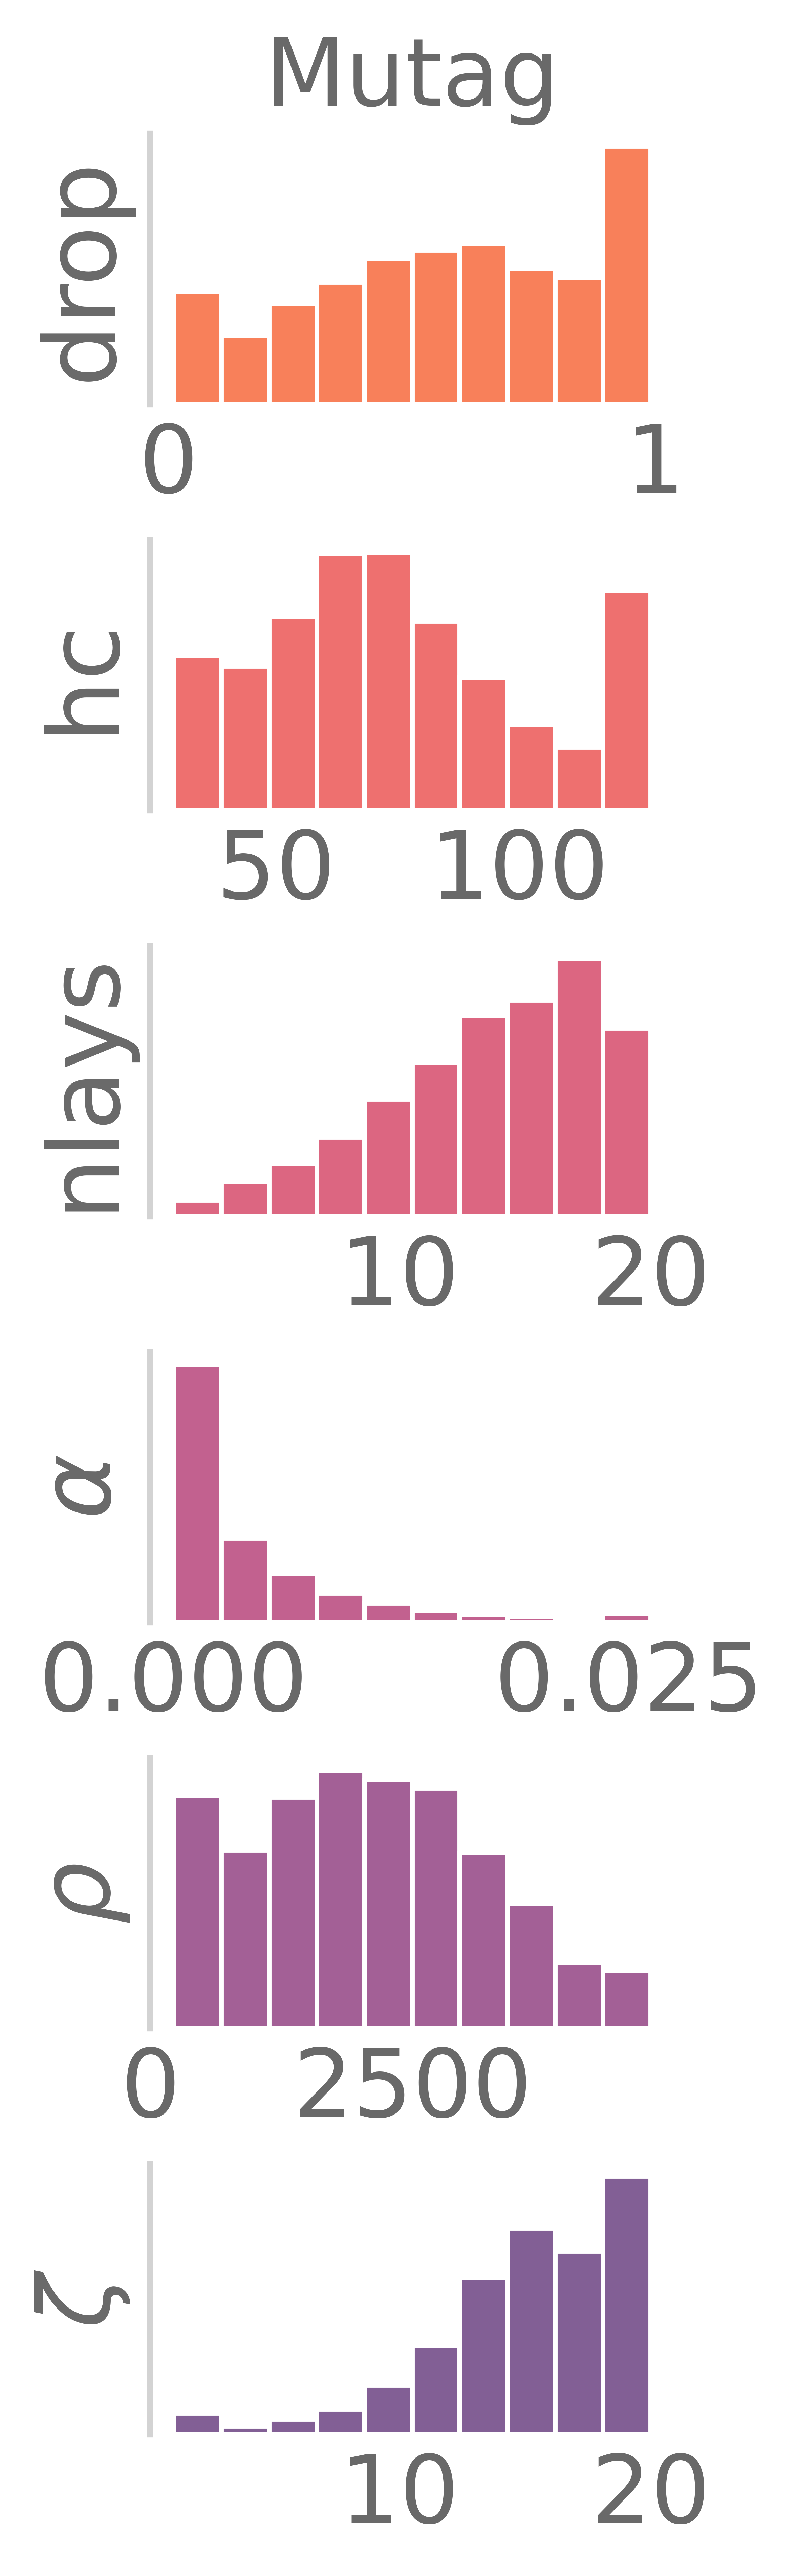

In [13]:
# Now, let us pull the MUTAHG hyperparameters 
df = pd.read_csv('scripts_graph/results_fi/results.csv', delimiter=',', header=None)
header=df.values[0,:]
df =pd.read_csv('scripts_graph/results_fi/filename_.csv', delimiter=' ', header=None, names=header)
# print(df.head())
q_10 = np.quantile(df.objective.values, 0.80)
real_df = df.loc[df['objective'] > q_10].drop(columns=['elapsed_sec', 'duration', 'id'])
model = GaussianCopula()
model.fit(real_df)
df = model.sample(num_rows= 10000)


import matplotlib.pyplot as plt
import seaborn as sns
CB91_Blue = '#05e1e1'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list =['#405952',
            '#9C9B7A',
            '#FFD393',
            '#FF974F',
            '#F54F29',
            ]
CB91_Grad_BP = ['#f8805a',
'#ee706f',
'#dc6681',
'#c2618f',
'#a36096',
'#825f95',
'#615c8d',
'#46587e',
'#33516c',
'#2a4858']

small = 16
med = 18
large = 20
plt.style.use('seaborn-white')
COLOR = 'dimgrey'
rc={'axes.titlesize': small,
    'legend.fontsize': small,
    'axes.labelsize': med,
    'axes.titlesize': small,
    'xtick.labelsize': small,
    'ytick.labelsize': med,
    'figure.titlesize': small, 
    'font.family': "sans-serif",
    'font.sans-serif': "Myriad Hebrew",
    'text.color' : COLOR,
    'axes.labelcolor' : COLOR,
    'axes.axisbelow': False,
    'axes.edgecolor': 'lightgrey',
    'axes.facecolor': 'None',
    'axes.grid': False,
    'axes.labelcolor': 'dimgrey',
    'axes.spines.right': False,
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'figure.facecolor': 'white',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'w',
    'patch.force_edgecolor': True,
    'text.color': 'dimgrey',
    'xtick.bottom': True,
    'xtick.color': 'dimgrey',
    'xtick.direction': 'out',
    'xtick.top': False,
    'ytick.color': 'dimgrey',
    'ytick.direction': 'out',
    'ytick.left': False,
    'ytick.right': False}
plt.rcParams.update(rc)
plt.rc('text', usetex = False)
offset=2.5
columns = ['dropout', 'hc', 'n_lays', 'lr',  'tot_updates', 'x_updates']
labels  = ['drop', 'hc', 'nlays', '$\\alpha$', '$\\rho$',  '$\\zeta$']
print(columns)
fig,ax =  plt.subplots(len(columns),1, figsize=(2,9), dpi = 1000, gridspec_kw = {'wspace':0.5, 'hspace':0.5})
for (j,col) in enumerate(columns):
    # Make some labels.
    print(col, df[col])
    print(col, len(df[col]))
    ax[j].hist(df[col],  color = CB91_Grad_BP[j], density=True)
    ax[j].set_ylabel(labels[j])
    ax[j].set_yticks([])
ax[0].set_title('Mutag')
sns.despine(left=False, bottom=True)


/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/kraghavan/miniconda3/envs/dh_posei/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


['dropout', 'hc', 'n_lays', 'lr', 'tot_updates', 'x_updates']
dropout 0       0.743289
1       0.522482
2       0.610802
3       0.797259
4       0.990961
          ...   
9995    0.790513
9996    0.810775
9997    0.698387
9998    0.286674
9999    0.617094
Name: dropout, Length: 10000, dtype: float64
dropout 10000
hc 0        38.0
1        78.0
2        35.0
3        76.0
4        93.0
        ...  
9995     75.0
9996    113.0
9997     37.0
9998     31.0
9999     52.0
Name: hc, Length: 10000, dtype: float64
hc 10000
n_lays 0       14.0
1        9.0
2        9.0
3       12.0
4       19.0
        ... 
9995    19.0
9996    15.0
9997    19.0
9998    10.0
9999    12.0
Name: n_lays, Length: 10000, dtype: float64
n_lays 10000
lr 0       0.003578
1       0.004896
2       0.006392
3       0.005315
4       0.001507
          ...   
9995    0.001889
9996    0.000029
9997    0.003114
9998    0.004344
9999    0.004044
Name: lr, Length: 10000, dtype: float64
lr 10000
tot_updates 0       2940.0
1    

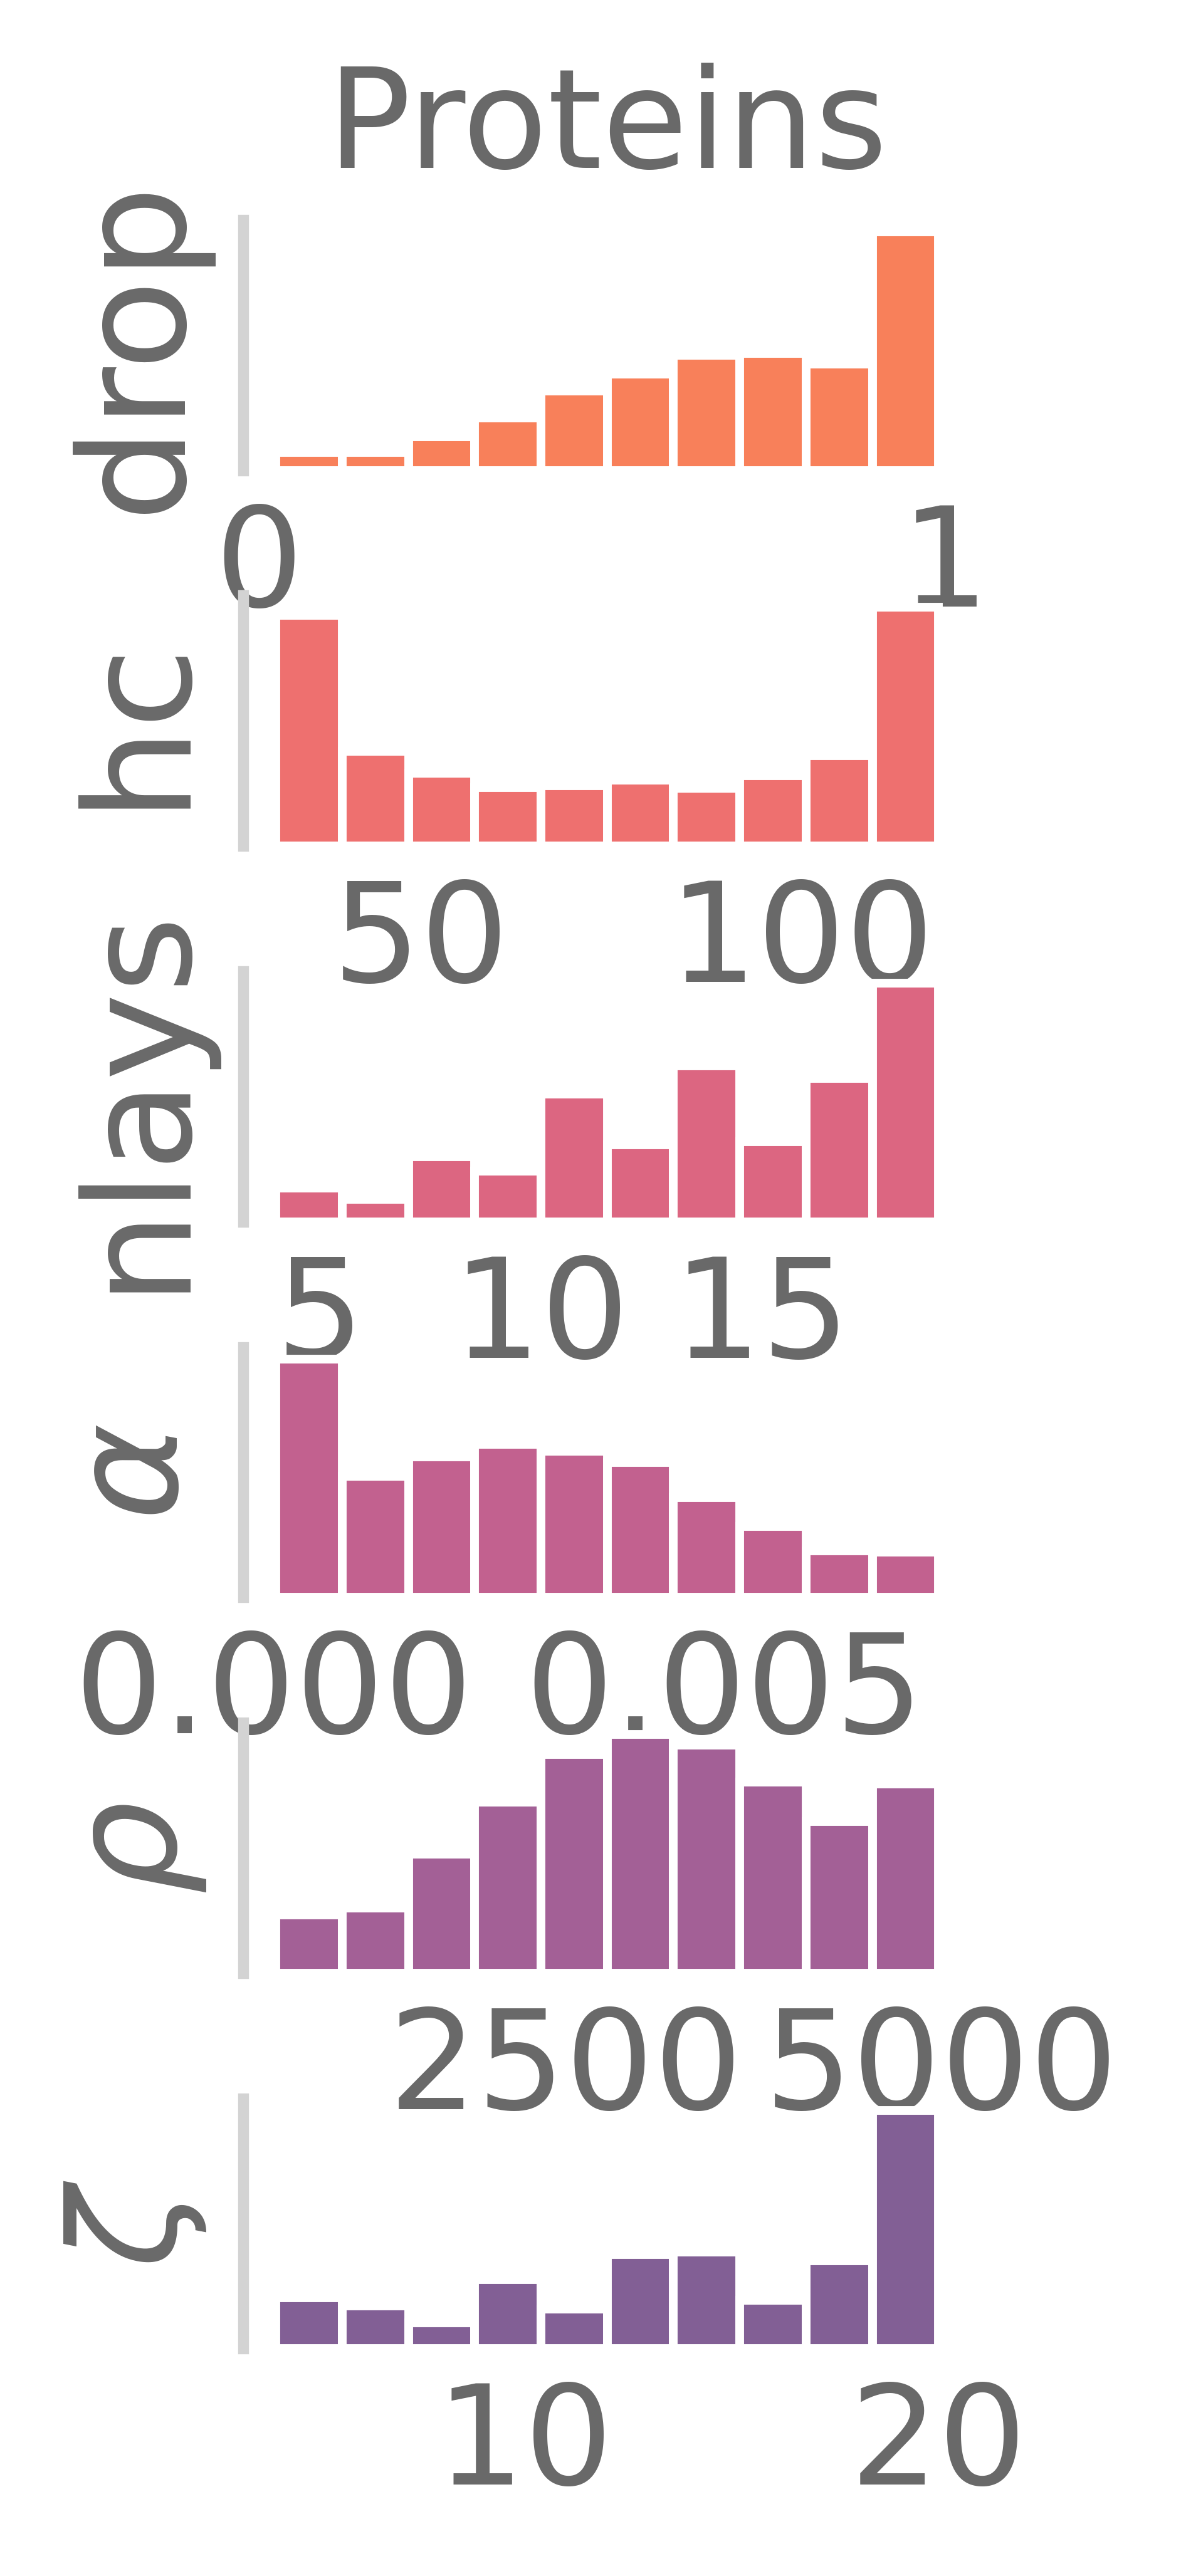

In [15]:
# Now, let us pull the MUTAHG hyperparameters 
df = pd.read_csv('scripts_graph/results_fi/results.csv', delimiter=',', header=None)
header=df.values[0,:]
df =pd.read_csv('scripts_graph/results_fi/filename_protein.csv', delimiter=' ', header=None, names=header)
# print(df.head())
q_10 = np.quantile(df.objective.values, 0.80)
real_df = df.loc[df['objective'] > q_10].drop(columns=['elapsed_sec', 'duration', 'id'])
model = GaussianCopula()
model.fit(real_df)
df = model.sample(num_rows= 10000)


import matplotlib.pyplot as plt
import seaborn as sns
CB91_Blue = '#05e1e1'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list =['#405952',
            '#9C9B7A',
            '#FFD393',
            '#FF974F',
            '#F54F29',
            ]
CB91_Grad_BP = ['#f8805a',
'#ee706f',
'#dc6681',
'#c2618f',
'#a36096',
'#825f95',
'#615c8d',
'#46587e',
'#33516c',
'#2a4858']

small = 16
med = 18
large = 20
plt.style.use('seaborn-white')
COLOR = 'dimgrey'
rc={'axes.titlesize': small,
    'legend.fontsize': small,
    'axes.labelsize': med,
    'axes.titlesize': small,
    'xtick.labelsize': small,
    'ytick.labelsize': med,
    'figure.titlesize': small, 
    'font.family': "sans-serif",
    'font.sans-serif': "Myriad Hebrew",
    'text.color' : COLOR,
    'axes.labelcolor' : COLOR,
    'axes.axisbelow': False,
    'axes.edgecolor': 'lightgrey',
    'axes.facecolor': 'None',
    'axes.grid': False,
    'axes.labelcolor': 'dimgrey',
    'axes.spines.right': False,
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'figure.facecolor': 'white',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'w',
    'patch.force_edgecolor': True,
    'text.color': 'dimgrey',
    'xtick.bottom': True,
    'xtick.color': 'dimgrey',
    'xtick.direction': 'out',
    'xtick.top': False,
    'ytick.color': 'dimgrey',
    'ytick.direction': 'out',
    'ytick.left': False,
    'ytick.right': False}
plt.rcParams.update(rc)
plt.rc('text', usetex = False)
offset=4
columns = ['dropout', 'hc', 'n_lays', 'lr',  'tot_updates', 'x_updates']
labels  = ['drop', 'hc', 'nlays', '$\\alpha$', '$\\rho$',  '$\\zeta$']
print(columns)
fig,ax =  plt.subplots(len(columns),1, figsize=(1.5,4.5), dpi = 1000, gridspec_kw = {'wspace':0.5, 'hspace':0.5})
for (j,col) in enumerate(columns):
    # Make some labels.
    print(col, df[col])
    print(col, len(df[col]))
    ax[j].hist(df[col],  color = CB91_Grad_BP[j], density=True)
    ax[j].set_ylabel(labels[j])
    ax[j].set_yticks([])
ax[0].set_title('Proteins')
sns.despine(left=False, bottom=True)


In [76]:
import numpy as np
import pandas as pd
path = '/home/kraghavan/Projects/CL/Graph-Continual-Learning/Results/mutag/'

# First we get the accuracies and the losses
mem = np.loadtxt(path+'MUTAG_acc_runs_memory.csv', delimiter=' ').reshape([-1,1])
mem_off_th = np.loadtxt(path+'switch_off_thetaMUTAG_acc_runs_memory.csv', delimiter=' ').reshape([-1,1])
mem_off_th_X= np.loadtxt(path+'switch_off_theta_X_MUTAG_acc_runs_memory.csv', delimiter=' ').reshape([-1,1])

data = np.concatenate([mem,  mem_off_th_X, mem_off_th], axis=1)
print(data)

columns_=['All terms', 'w/o IV', 'w/o II, III, IV']

df = pd.DataFrame(data, columns=columns_).iloc[1,:]
print(df)


[[1.         1.         1.        ]
 [0.89473684 0.78947368 0.73684211]]
All terms          0.894737
w/o IV             0.789474
w/o II, III, IV    0.736842
Name: 1, dtype: float64


Text(2.45, 0.77, 'w/o II, III, IV')

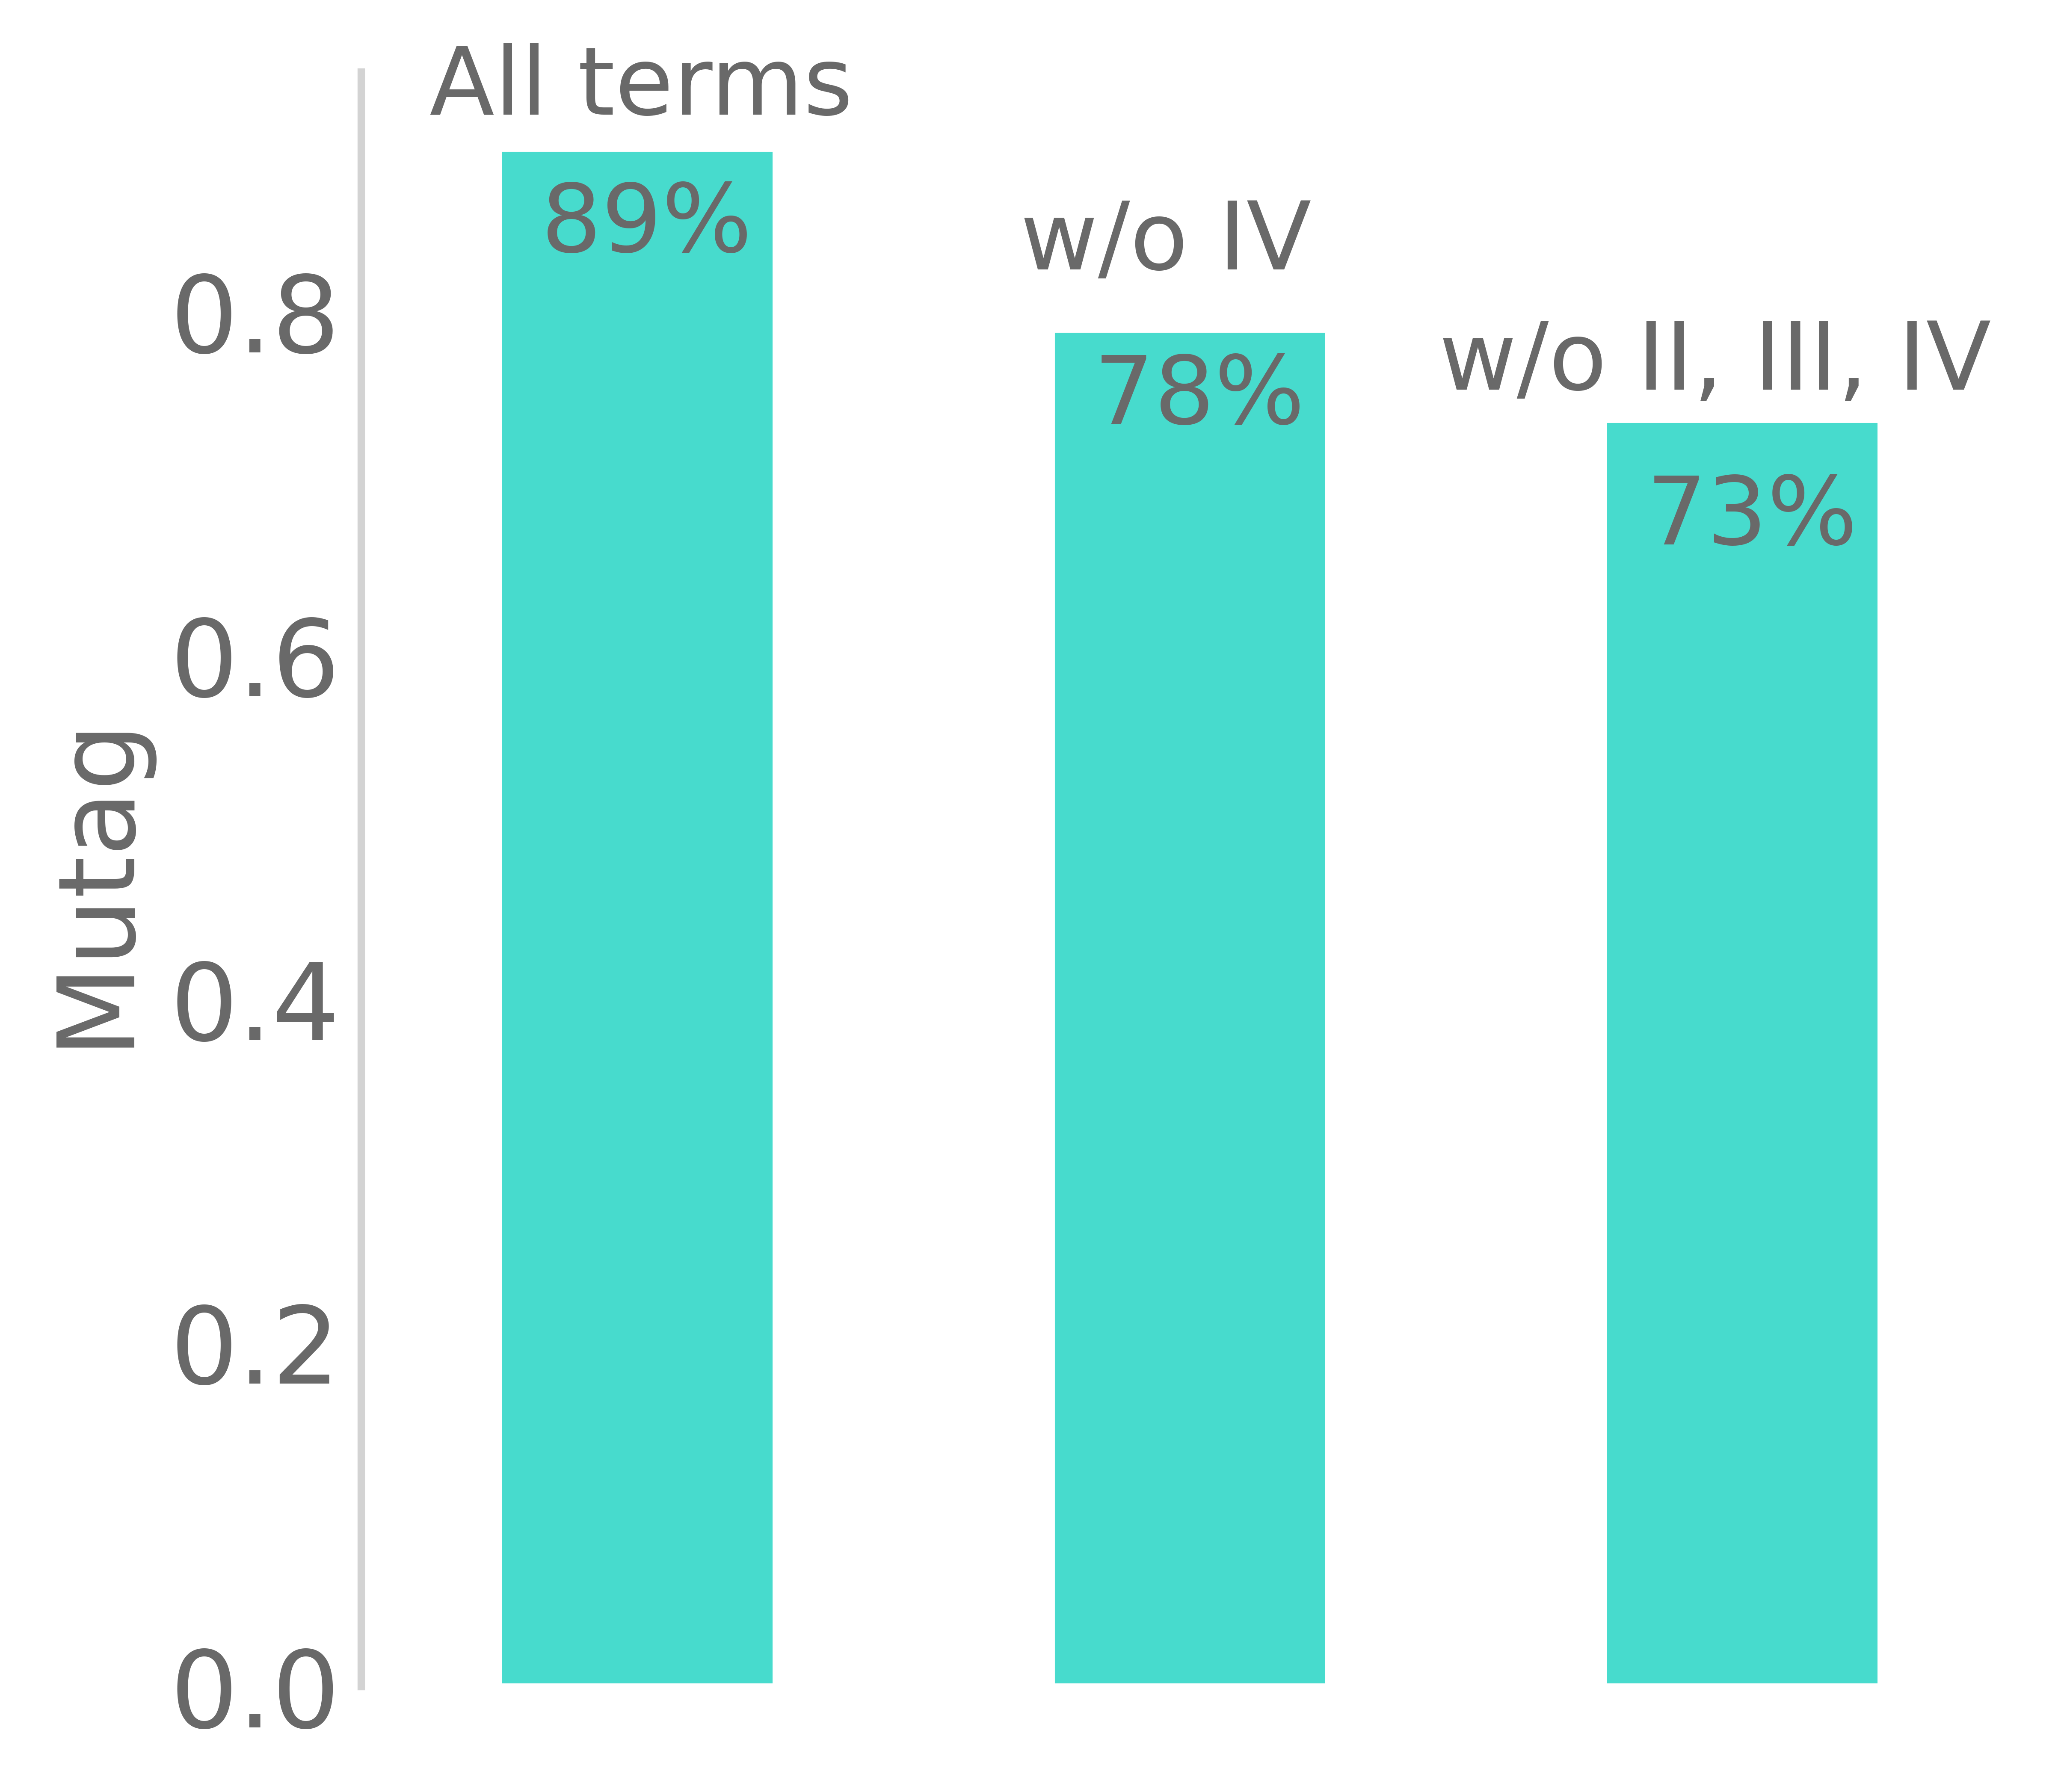

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CB91_Blue = '#05e1e1'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = ['#405952', '#9C9B7A', '#FFD393', '#FF974F', '#F54F29',]
CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']
small = 16
med = 18
large = 20

plt.style.use('seaborn-white')
COLOR = 'dimgrey'
rc={'axes.titlesize': small,
    'legend.fontsize': small,
    'axes.labelsize': med,
    'axes.titlesize': small,
    'xtick.labelsize': small,
    'ytick.labelsize': med,
    'figure.titlesize': small, 
    'font.family': "sans-serif",
    'font.sans-serif': "Myriad Hebrew",
    'text.color' : COLOR,
    'axes.labelcolor' : COLOR,
    'axes.axisbelow': False,
    'axes.edgecolor': 'lightgrey',
    'axes.facecolor': 'None',
    'axes.grid': False,
    'axes.labelcolor': 'dimgrey',
    'axes.spines.right': False,
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'figure.facecolor': 'white',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'w',
    'patch.force_edgecolor': True,
    'text.color': 'dimgrey',
    'xtick.bottom': False,
    'xtick.color': 'dimgrey',
    'xtick.direction': 'out',
    'xtick.top': False,
    'ytick.color': 'dimgrey',
    'ytick.direction': 'out',
    'ytick.left': False,
    'ytick.right': False}
plt.rcParams.update(rc)
plt.rc('text', usetex = False)
offset  = 3
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi = 1000, gridspec_kw = {'wspace':0.01, 'hspace':0.01})
df.plot.bar(stacked=True, color=CB91_Green, rot=-90)
ax.set_ylabel('Mutag')
#plt.legend(frameon=False)
sns.despine(left=False, bottom=True)
ax.set_xticks([])

ax.text(0.20, 0.85, 
        s='$89\\%$', #Required label with formatting
        va='center', #Vertical alignment
        ha='right', #Horizontal alignment
        color=COLOR, #Font colour and size
        fontsize=small)

ax.text(1.20, 0.75, 
        s='$78\\%$', #Required label with formatting
        va='center', #Vertical alignment
        ha='right', #Horizontal alignment
        color=COLOR, #Font colour and size
        fontsize=small)

ax.text(2.20, 0.68, 
        s='$73\\%$', #Required label with formatting
        va='center', #Vertical alignment
        ha='right', #Horizontal alignment
        color=COLOR, #Font colour and size
        fontsize=small)

ax.text(0.39, 0.93, 
        s=columns_[0], #Required label with formatting
        va='center', #Vertical alignment
        ha='right', #Horizontal alignment
        color=COLOR, #Font colour and size
        fontsize=small)

ax.text(1.22, 0.84, 
        s=columns_[1], #Required label with formatting
        va='center', #Vertical alignment
        ha='right', #Horizontal alignment
        color=COLOR, #Font colour and size
        fontsize=small)

ax.text(2.45, 0.77, 
        s=columns_[2], #Required label with formatting
        va='center', #Vertical alignment
        ha='right', #Horizontal alignment
        color=COLOR, #Font colour and size
        fontsize=small)

# ax.set_yticks([])
